## Binomial Distributions: Problem
Each of you will throw 20 times/experiment 1, 4 and 10 quarters
and counts the number of heads for each throw. You will all
combine your results and draw the distributions for each
experiment that you will compare to your theoretical binomial
distributions

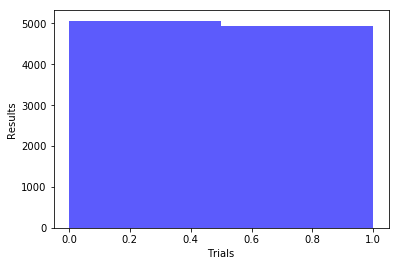

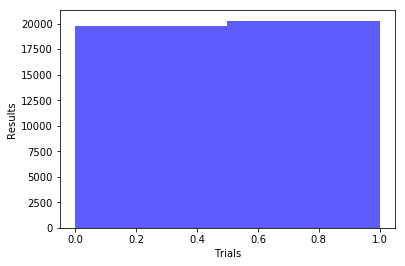

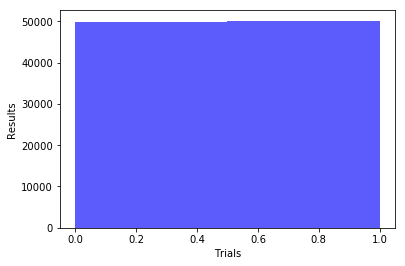

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import random

number_of_coins = [1, 4, 10]
experiments = 10000

for i, coins in enumerate(number_of_coins):
    results = np.zeros((experiments, coins))

    for j in range(experiments):
        for coin in range(coins):
            if random.getrandbits(1):
                results[j][coin] = 1

    n, bins, patches = plt.hist(np.ravel(results), 2, facecolor='#2524fc', alpha=0.75)
    plt.xlabel('Trials')
    plt.ylabel('Results')
    plt.show()

## Problem
What is the distribution of a sum of n random variables whose
values are randomly picked between 0 and 1 with equal
probability? Do the experiment using simulations.

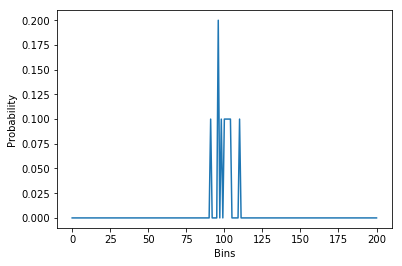

In [98]:
# Try changing me
random_variables = 200
experiments = 10

inclusive_total = random_variables + 1 # Add 1 to account for all sums
graph_bins = np.arange(0, inclusive_total, 1)
bins = np.zeros(inclusive_total, dtype=np.float64)  
normalized_bins = np.zeros(inclusive_total, dtype=np.float64)

# Calculate the sum of random variables
for _ in range(experiments):
    value = 0
    for i in range(random_variables):
        if getrandbits(1):
            value = value + 1
    bins[value] = bins[value] + 1

for i, value in enumerate(bins):
    normalized_bins[i] = (value / experiments)
    
plt.plot(graph_bins, normalized_bins)
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.show()

# Lecture 7 Recreation

## True Dataset

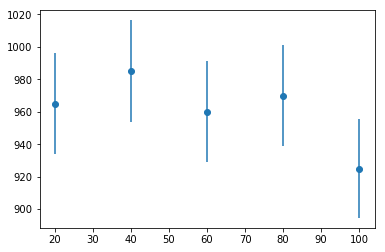

In [3]:
x = np.arange(20, 120, 20)
# Note: There are 2 different values for y in the slides
# y = np.array([940, 1010, 960, 955, 890])  # Observed Values
y = np.array([965, 985, 960, 970, 925])  # Observed Values
e = np.sqrt(y)  # Uncertainty

fig, ax = plt.subplots()
plt.plot(linestyle="None")
ax.errorbar(x, y, e, linestyle='None', marker='o')
plt.xlabel('Photon Energy(kEV)')
plt.ylabel('Nb Photons')
plt.show()

In [4]:
## Model
def linear_model(a, photon_energy):
    """Linear Model

    Args:
        a: Slope
        photon_energy: Observed photon energy.

    Returns:
        Value from the linear function.
    """
    return (a * photon_energy) + 1000

## Minimizing Function

In [5]:
def minimizing_function(a, photon_energy, observed_values):
    """Chi Squared Minimizing Function

    Args:
        a: Slope
        photon_energy: Array of energy observed
        observed_values: Array of number of observed photons.

    Returns:
        Value from the chi squared function.
    """
    value = 0
    for i, observed_value in enumerate(observed_values):
        predicated_value = linear_model(a, photon_energy[i])  # Retrieve the value for the predicted value from the model
        value = value + np.square((observed_value - predicated_value) / np.sqrt(observed_value))
    return value

## Find the minimum a value

In [97]:
import sys

possible_minimum_a = np.arange(-.8, -.6, .0001)  # Generate values to brute force a
minimum = sys.maxsize  # Set the max size so any value will be less than the minimum
minimum_a = 0  # Keep track of the minimum a value used

for i in possible_minimum_a:
    temp_min = minimizing_function(i, x, y)
    if temp_min < minimum:
        minimum = temp_min
        minimum_a = i

print("Minimum Chi-Squared Value: %s" % minimum)
print("Minimum A Value: %s" % minimum_a)

Minimum Chi-Squared Value: 1.2136473089
Minimum A Value: -0.6215


## Reconstructed Spectrum

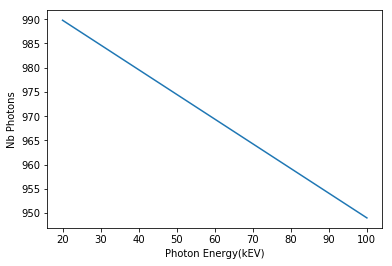

In [101]:
a = np.arange(20, 120, 20)
b = np.empty([len(a)]) 
for i, value in enumerate(a):
    b[i] = linear_model(minimum_a, value)

fig, ax = plt.subplots()
plt.plot(a, b)
plt.xlabel('Photon Energy(kEV)')
plt.ylabel('Nb Photons')
plt.show()

## Fitted Linear Model 

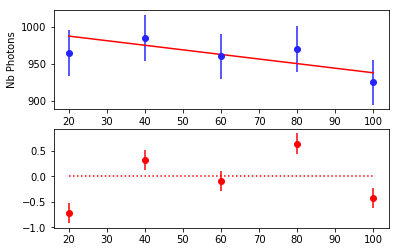

In [99]:
plt.subplot(211)  # the first subplot in the first figure
plt.plot(a, b, color='red')
plt.xlabel('Photon Energy(kEV)')
plt.ylabel('Nb Photons')
plt.errorbar(x, y, e, linestyle='None', color='#2524fc', marker='o')

# Standard Deviations
std = (y - b) / np.sqrt(b)
err_calc = ((b * (np.sqrt(b) + 1) / np.sqrt(b)) - b)  # Calculates the value of 1 std

plt.subplot(212)  # the first subplot in the first figure
plt.errorbar(x, std, yerr=.2, linestyle='None', color='red', marker='o')
plt.plot(x, [0, 0, 0, 0, 0], linestyle='dotted', color='red')
plt.xlabel('Photon Energy(kEV)')
plt.ylabel('Nb σ')
plt.show()

## Generate Fake Data Using the Model
### a = minimum_a

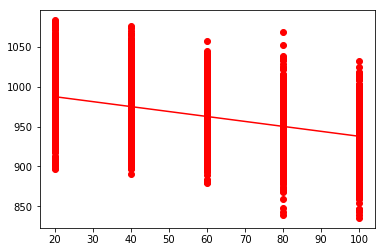

In [9]:
# TODO Change the normal distribution size

generated_data_size = 1000
minimum_number_photons = linear_model(minimum_a, x)

# 2-D Array to store the generated normal distributions for each point
generated_data = np.zeros([len(minimum_number_photons), generated_data_size])
generated_data_x_ticks = np.zeros([len(minimum_number_photons), generated_data_size])
for i, data in enumerate(minimum_number_photons):
    # Normal Distribution for each point
    generated_data[i] = np.random.normal(data, size=generated_data_size, scale=err_calc[i])
    generated_data_x_ticks[i] = np.repeat(x[i], generated_data_size)
    plt.plot(generated_data_x_ticks[i], generated_data[i], linestyle='None', color='red', marker='o')

# Linear Model
plt.plot(a, b, color='red')
plt.xlabel('Photon Energy(kEV)')
plt.ylabel('Nb Photons')
plt.show()

## Chi Squared Fit for the generated data 

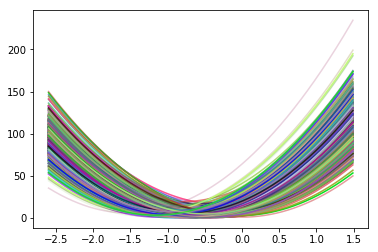

In [10]:
for i in range(generated_data_size):
    generated_obs = np.zeros(len(x))
    for j, data in enumerate(generated_data):
        generated_obs[j] = data[i]
    
    possible_minimum_a = np.arange(-2.6, 1.5, .01)  # Generate values to brute force a
    a_values = np.arange(-2.6, 1.5, .01)  # Copy the array instead of generating a zero one
    minimum = sys.maxsize  # Set the max size so any value will be less than the minimum
    minimum_a = 0  # Keep track of the minimum a value used
    
    for j, data in enumerate(possible_minimum_a):
        temp_min = minimizing_function(data, x, generated_obs)
        a_values[j] = temp_min

        if temp_min < minimum:
            minimum = temp_min
            minimum_a = data
            
    plt.plot(possible_minimum_a, a_values, color=np.random.rand(4))
    plt.xlabel('a')
    plt.ylabel('X^2')
plt.show()

## Minimum Chi Squared and 'A' distribution

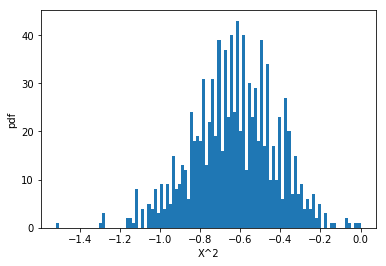

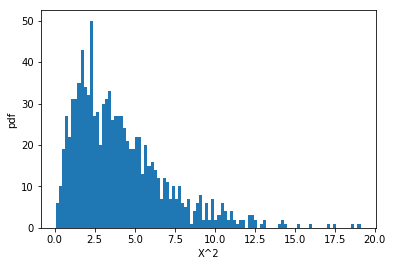

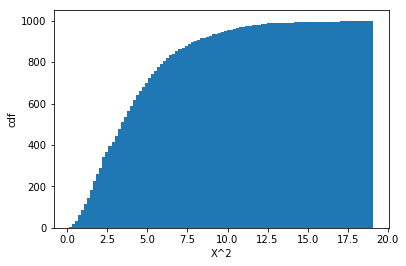

In [100]:
minimum_a_array = np.zeros(generated_data_size)
minimum_chi_array = np.zeros(generated_data_size)

for i in range(generated_data_size):
    generated_obs = np.zeros(len(x))
    for j, data in enumerate(generated_data):
        generated_obs[j] = data[i]
    
    possible_minimum_a = np.arange(-2.6, 1.5, .01)  # Generate values to brute force a
    a_values = np.arange(-2.6, 1.5, .01)  # Copy the array instead of generating a zero one
    minimum = sys.maxsize  # Set the max size so any value will be less than the minimum
    minimum_a = 0  # Keep track of the minimum a value used
    
    for j, data in enumerate(possible_minimum_a):
        temp_min = minimizing_function(data, x, generated_obs)
        a_values[j] = temp_min

        if temp_min < minimum:
            minimum = temp_min
            minimum_a = data
    # Keep track of all the global minimums
    minimum_chi_array[i] = minimum
    minimum_a_array[i] = minimum_a  # Keep track of all minimum a's

plt.hist(minimum_a_array, 100)
plt.xlabel('X^2')
plt.ylabel('pdf')
plt.show()
plt.hist(minimum_chi_array, 100)
plt.xlabel('X^2')
plt.ylabel('pdf')
plt.show()
plt.hist(minimum_chi_array, 100, cumulative=True)
plt.xlabel('X^2')
plt.ylabel('cdf')
plt.show()

## Confidence Interval

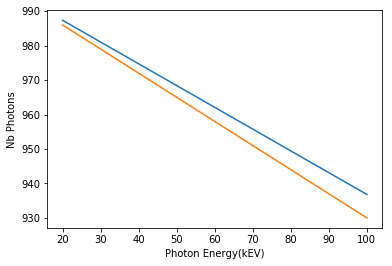

In [102]:
val = linear_model(np.mean(minimum_a_array), x)
true = linear_model(-.7, x)  # 'True' Spectrum
plt.plot(x, val)
plt.xlabel('Photon Energy(kEV)')
plt.ylabel('Nb Photons')
plt.plot(x, true)
plt.show()